# Example of THz TDS reflection data analysis
This should be a general approach to transmission TDS using the thzsoftware library.

In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
from thzsoftware import data as d
from thzsoftware.tds import pulse as pl
from thzsoftware.tds import phase as ph
from thzsoftware import math as mt

In [11]:
plt.rcParams["figure.figsize"] = (24,8)

## Load data
To automatically load data, we construct the *DataSet* class contained in *thzsoftware.data*. This class looks for directories, e.g. for measurement days in the supplied data directory, then for files within that subdirectory. These are ordered in a dictionary built as follows:

set = {data_directory:{file_name:{type]}}

The type option is given, such that one easily can save different dataframes with the same measurement name. In this case we initially load a time trace, calling the type "time". Later, we will compute a fourier transform, saving it with the same measurement name and the type "spectrum".

In [13]:
data_set = d.DataSet("./example data/reflection","time")
keys = data_set.keys
directory = list(keys.keys())[0]
bare_file = list(keys[directory].keys())[0]
sample_file = list(keys[directory].keys())[1]

print("Keys for displaying data: ", data_set.keys)
data_set.data[directory][sample_file]["time"]

Keys for displaying data:  {'data 03Jun22': {'brushed_steel_bare.pulse': 'time', 'brushed_steel_Si525um.pulse': 'time'}}


,Time_abs/ps,Signal 1/nA,Signal 2/nA
0,1240.00,0.023667,-0.012972
1,1240.05,0.015022,-0.016962
2,1240.10,-0.047303,0.005904
3,1240.15,0.034516,-0.006357
4,1240.20,-0.025902,0.030386
...,...,...,...
1396,1309.80,-1.800306,0.005742
1397,1309.85,-1.898067,-0.013665
1398,1309.90,-1.995015,-0.002828
1399,1309.95,-2.186157,0.021673


### Plotting:

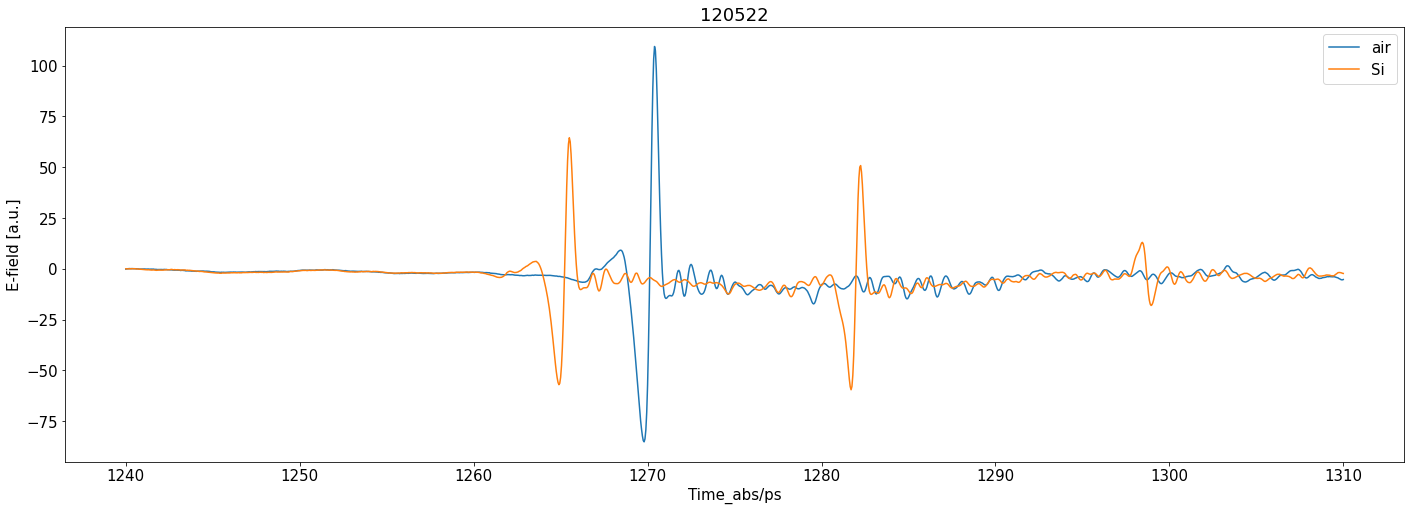

In [14]:
plt.figure()
plt.rc('font', size=15)
axes = plt.axes(ylabel="E-field [a.u.]")
data_set.data[directory][bare_file]["time"].plot(x=0,y=1, figsize=(24, 8), title='120522', ax=axes)
data_set.data[directory][sample_file]["time"].plot(x=0,y=1, figsize=(24, 8), ax=axes)
axes.legend(["air", "Si"])
plt.show()

## Extract data as arrays

In [15]:
bare_times_array = data_set.data[directory][bare_file]["time"].iloc[:, 0].values
bare_signal_array = data_set.data[directory][bare_file]["time"].iloc[:, 1].values

sample_times_array = data_set.data[directory][sample_file]["time"].iloc[:, 0].values
sample_signal_array = data_set.data[directory][sample_file]["time"].iloc[:, 1].values

## Naive time delay calculations of L and n
Using the time delay of the measured pulse and its echo, we can calculate the refractive index, n, and the sample thickness, L.
We find the pulse delays for te sample trace.

In [20]:
pulse_indices = pl.define_thz_pulses(bare_signal_array)
width = pulse_indices[1] - pulse_indices[0]
pl.find_delayed_pulse(bare_signal_array, sample_signal_array, width, number_of_pulses=2)[:2]

array([2783,    7])